# Production & Quality Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
device_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\DeviceProperty.csv")
prod_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\ProductionMetric.csv")
quality_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\Quality.csv")
prod_df

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,0.000000,185.919232,0.0,185.919232,Unplanned Stop,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1
9997,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,0.000000,169.602517,0.0,169.602517,Unplanned Stop,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1


In [3]:
quality_df

,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
0,1771948,Line 4,6,Detected by Max WIP,5468380
1,1772152,Line 4,11,Reject,5468383
2,1772153,Line 4,9,Detected by Max WIP,5468383
3,1772154,Line 4,11,Detected by Max WIP,5468386
4,1772155,Line 4,9,Reject,5468386
...,...,...,...,...,...
7165,1827594,Line 3,7,Detected by Max WIP,5551952
7166,1827612,Line 1,10,Underweight,5552001
7167,1827613,Line 1,14,Cosmetic Defect,5552001
7168,1827634,Line 4,13,Reject,5552039


In [4]:
# calculating overall reject rate 
total_reject_counts = prod_df['reject_count'].sum()
total_good_counts = prod_df['good_count'].sum()
overall_reject_rate = total_reject_counts/(total_good_counts + total_reject_counts)
overall_reject_rate

0.03674795927494914

In [5]:
print(f"Total Rejects: {total_reject_counts}")
print(f"Total Good: {total_good_counts}")
print(f"Overall Reject Rate: {overall_reject_rate: .2%}")

Total Rejects: 48066
Total Good: 1259925
Overall Reject Rate:  3.67%


In [6]:
# identifying the most common reject_reason_display_names from the Quality table and since the data looks good, there's no need to link it as of now
reason_counts = quality_df['reject_reason_display_name'].value_counts()
print(reason_counts)

reject_reason_display_name
Reject                 1418
Detected by Max WIP    1359
Cosmetic Defect         699
Out of Spec             630
Underweight             627
Overweight              622
Scratch                 602
xyz                     323
foreign particle        307
Bad Packaging           304
Squished                279
Name: count, dtype: int64


In [7]:
# most common reason is Reject with 1418, Detected by Max WIP second with 1359, last place is Squished with 279

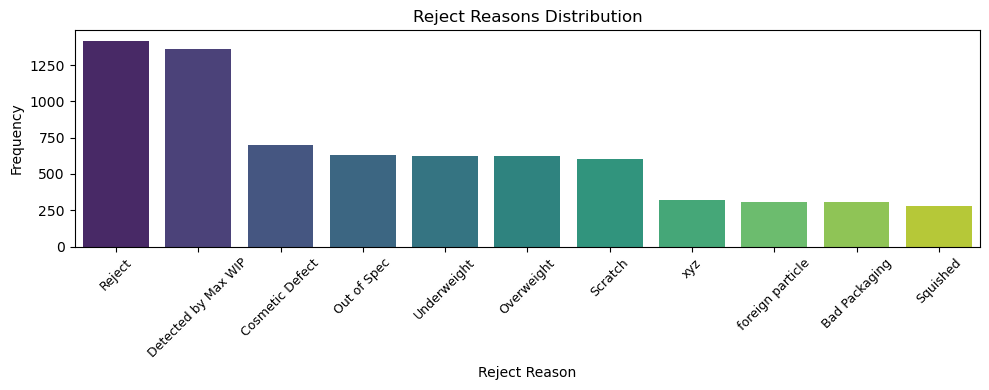

In [8]:
# visualizing the frequency of distribution
plt.figure(figsize=(10,4))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='viridis', hue=reason_counts.index, legend=False)
plt.title("Reject Reasons Distribution")
plt.xlabel("Reject Reason", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

In [22]:
# comparing average good_counts per hour of run_time across different deviceKeys
# making sure to not divide by 0
prod_df = prod_df[prod_df['run_time'] > 0]
prod_df['goods_per_hour'] = prod_df['good_count']/(prod_df['run_time']/60)
avg_goods_per_hour = prod_df.groupby('deviceKey')['goods_per_hour'].mean().reset_index()
avg_goods_per_hour

,deviceKey,goods_per_hour
0,Line1,25.441962
1,Line2,23.865520
2,Line3,21.024081
3,Line4,23.563146


In [11]:
# no noticeable differences aside from Line 3 which is off by little compared to the rest and Line 1 which has the most
# the differences aren't too big though

In [39]:
# finding if there is a correlation between unplanned_stop_time and reject_count where both occur
# making sure it's only applying those values greater than 0 
correlation_df = prod_df[(prod_df['unplanned_stop_time'] > 0) & (prod_df['reject_count'] > 0)]
correlation = correlation_df['unplanned_stop_time'].corr(correlation_df['reject_count'])
print(f"Correlation: {correlation: .2f}")

Correlation:  nan


In [40]:
# got nan as a result, could be an indictation of nulls in either or both columns or constant values
# checking for nulls
(correlation_df[['unplanned_stop_time', 'reject_count']].isnull().sum())

unplanned_stop_time    0
reject_count           0
dtype: int64

In [41]:
# no nulls, could be a case of constant values aka. no correlation
# checking for constant values
(correlation_df[['unplanned_stop_time', 'reject_count']].std())

unplanned_stop_time   NaN
reject_count          NaN
dtype: float64

In [42]:
# conclusion is that there are no correlation between the two 

<Axes: >

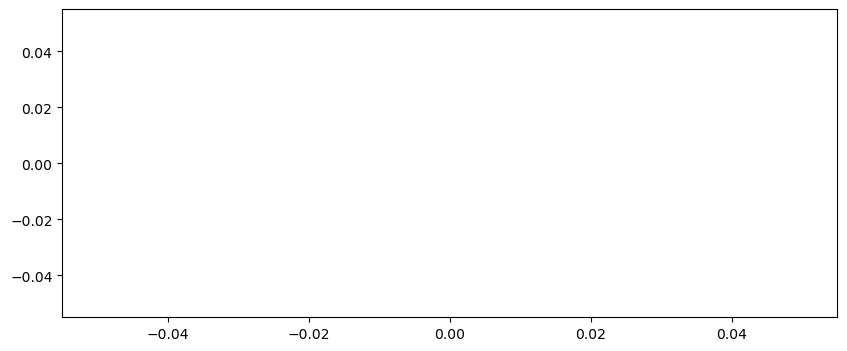

In [43]:
# visualizing this relationship
plt.figure(figsize=(10,4))
sns.scatterplot(data=correlation_df, x='unplanned_stop_time', y='reject_count')

In [44]:
# no points which makes sense because there's no correlation
# double checking
(correlation_df.shape)

(0, 19)

In [45]:
(correlation_df.head(10))

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name,goods_per_hour


In [46]:
# loosening up restrictions just to further visualize this point
correlation_df = prod_df[(prod_df['unplanned_stop_time'] >= 0) & (prod_df['reject_count'] >= 0)]
correlation_df

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name,goods_per_hour
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.0,0.0,0.0,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2,20.794860
5,5552053,Line3,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:05:37.3369440 -06:00,132,12,237.657641,337.336944,0.0,0.0,0.0,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2,23.478010
7,5552039,Line4,2025-01-29 18:51:40.5108640 -06:00,2025-01-29 19:00:00.0000000 -06:00,187,19,327.952000,499.489136,0.0,0.0,0.0,Run,Running,Running Normally,Part J-4000,Part J,Second Shift,Team 3,22.462951
8,5552028,Line3,2025-01-29 18:51:35.1856440 -06:00,2025-01-29 19:00:00.0000000 -06:00,178,21,327.890812,504.814356,0.0,0.0,0.0,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2,21.156292
11,5552034,Line1,2025-01-29 18:47:50.6706630 -06:00,2025-01-29 19:00:00.0000000 -06:00,428,7,733.638375,729.329337,0.0,0.0,0.0,Run,Running,Running Normally,Part P-2000,Part P,Second Shift,Team 2,35.210431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,5539551,Line2,2025-01-17 11:33:16.9599770 -06:00,2025-01-17 11:41:17.0000000 -06:00,274,3,480.948175,480.040023,0.0,0.0,0.0,Run,Running,Running Normally,Part C-1000,Part C,First Shift,Team 3,34.247144
9994,5420584,Line3,2025-01-17 11:29:11.4843000 -06:00,2025-01-17 11:42:10.1443170 -06:00,431,18,739.379525,778.660017,0.0,0.0,0.0,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1,33.210900
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.0,0.0,0.0,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1,30.478280
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.0,0.0,0.0,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1,9.448430


<Axes: xlabel='unplanned_stop_time', ylabel='reject_count'>

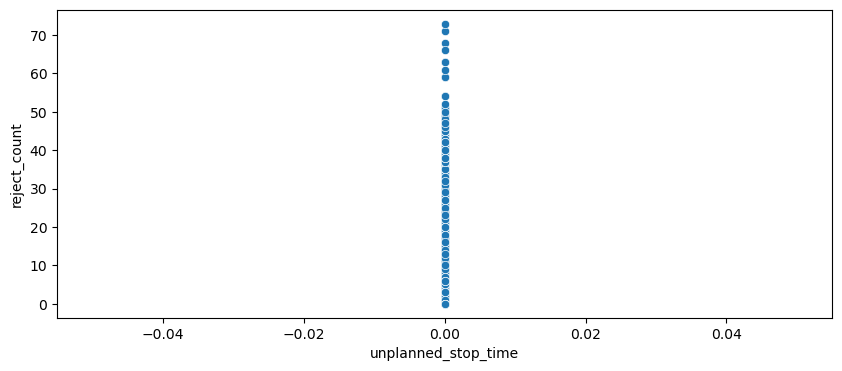

In [49]:
# getting quick overview of what visual is going to look like
plt.figure(figsize=(10,4))
sns.scatterplot(data=correlation_df, x='unplanned_stop_time', y='reject_count')

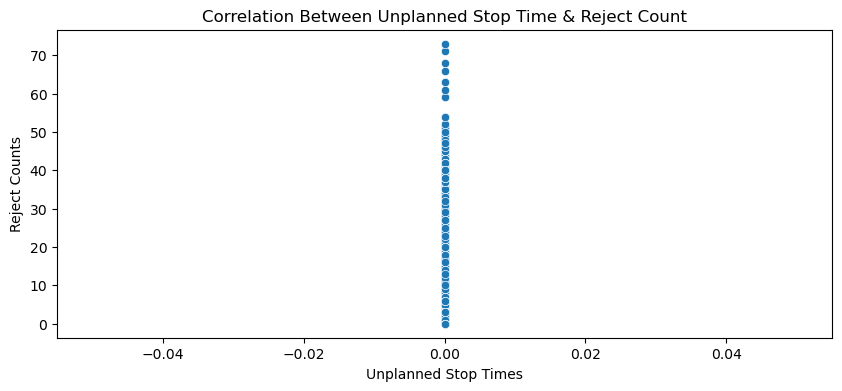

In [50]:
# final visual
plt.figure(figsize=(10,4))
sns.scatterplot(data=correlation_df, x='unplanned_stop_time', y='reject_count')
plt.title('Correlation Between Unplanned Stop Time & Reject Count')
plt.xlabel('Unplanned Stop Times')
plt.ylabel('Reject Counts')
plt.show()

In [ ]:
# No correlation makes sense since when the machines are stopped it isn't possible to produce labels